# FINANCIAL MARKETS ANALYTICS
LORENZO LOBOSCO 851289
GIULIA BECCARIA 851286

In [1]:
import pandas as pd
import numpy as np
#Data loading
data = pd.read_excel('Euro.xlsx', header=None)

In [130]:
#save in lists the values of factors and dates
fattori = ["PE_RATIO", "FIVE_YR_AVG_PRICE_EARNINGS", "T12M_DIL_PE_CONT_OPS", "10_YEAR_MOVING_AVERAGE_PE", "PX_TO_TANG_BV_PER_SH", "CURRENT_EV_TO_12M_SALES", "CURRENT_EV_TO_T12M_EBITDA", "FIVE_YEAR_AVG_EV_TO_T12_EBITDA", "T12M_DIL_EPS_CONT_OPS", "TRAIL_12M_EBITDA_PER_SHARE", "TRAIL_12M_SALES_PER_SH", "NET_DEBT_PER_SHARE", "TANG_BOOK_VAL_PER_SH", "NORMALIZED_ACCRUALS_CF_METHOD", "EBITDA_MARGIN", "EBITDA_MARGIN_3YR_AVG", "RSI_14D", "PX_LAST", "MOV_AVG_50D", "MOV_AVG_20D", "MOV_AVG_10D", "MOV_AVG_5D", "MOV_AVG_40D", "MOV_AVG_30D", "OPERATING_ROIC", "VOLATILITY_90D", "VOLATILITY_30D", "VOLATILITY_180D", "RSI_30D", "RSI_9D", "T12M_DVD_PAYOUT_RATIO", "EQY_DPS_NET_5YR_GROWTH", "EQY_REC_CONS", "BEST_EPS", "WACC_COST_EQUITY", "NORMALIZED_ROE", "5YR_AVG_RETURN_ON_EQUITY", "CUR_MKT_CAP","NORMALIZED_ACCRUALS_BS_METHOD", "PX_TO_BOOK_RATIO"]
date =["date", "31/01/2003",  "28/02/2003", "31/03/2003", "30/04/2003", "30/05/2003", "30/06/2003", "31/07/2003", "29/08/2003", "30/09/2003", "31/10/2003", "28/11/2003", "31/12/2003" , "30/01/2004", "27/02/2004", "31/03/2004", "30/04/2004", "31/05/2004", "30/06/2004", "30/07/2004", "31/08/2004", "30/09/2004", "29/10/2004", "30/11/2004", "31/12/2004", "31/01/2005", "28/02/2005", "31/03/2005", "29/04/2005", "31/05/2005", "30/06/2005", "29/07/2005", "31/08/2005", "30/09/2005", "31/10/2005", "30/11/2005", "30/12/2005", "31/01/2006", "28/02/2006", "31/03/2006", "28/04/2006", "31/05/2006", "30/06/2006", "31/07/2006", "31/08/2006", "29/09/2006", "31/10/2006", "30/11/2006", "29/12/2006", "31/01/2007", "28/02/2007", "30/03/2007", "30/04/2007", "31/05/2007", "29/06/2007", "31/07/2007", "31/08/2007", "28/09/2007", "31/10/2007", "30/11/2007", "31/12/2007", "31/01/2008", "29/02/2008", "31/03/2008", "30/04/2008", "30/05/2008", "30/06/2008", "31/07/2008", "29/08/2008", "30/09/2008", "31/10/2008", "28/11/2008", "31/12/2008", "30/01/2009", "27/02/2009", "31/03/2009", "30/04/2009", "29/05/2009", "30/06/2009", "31/07/2009", "31/08/2009", "30/09/2009", "30/10/2009", "30/11/2009", "31/12/2009", "29/01/2010", "26/02/2010", "31/03/2010", "30/04/2010", "31/05/2010", "30/06/2010", "30/07/2010", "31/08/2010", "30/09/2010", "29/10/2010", "30/11/2010", "31/12/2010", "31/01/2011", "28/02/2011", "31/03/2011", "29/04/2011", "31/05/2011", "30/06/2011", "29/07/2011", "31/08/2011", "30/09/2011", "31/10/2011", "30/11/2011", "30/12/2011", "31/01/2012", "29/02/2012", "30/03/2012"]

In [131]:
# Get all equities
equities = data[0].apply(lambda x: False if pd.isna(x) else 'Equity' in x)
equities = data.loc[equities][0]


In [132]:
#create a df conteining just security prices
prices = data[data.iloc[:, 0] == fattori[17]]
prices = prices.iloc[:798, 1:]

In [133]:
prices=prices.T

In [134]:
prices = prices.rename(index=dict(zip(prices.index, date[1:])), columns=dict(zip(prices.columns, equities)))

In [135]:
prices

,ABI BB Equity,FP FP Equity,UNA NA Equity,SAN FP Equity,ENI IM Equity,SIE GR Equity,MC FP Equity,SAP GR Equity,VOW GR Equity,BAS GR Equity,...,SBT FP Equity,HIM FP Equity,BUE GR Equity,ALMIL FP Equity,M5Z GR Equity,TAM FP Equity,SII FP Equity,UZU GR Equity,TNFN FP Equity,MLM IM Equity
31/01/2003,11.6095,30.9888,17.4333,48.65,14.064,38.15,39.38,21.65,38.357,17.26,...,3.2434,0.36,1.519,0,19.55,12.6,1.8443,12.464,52.5,0
28/02/2003,9.959,30.2486,17.5333,49.62,13.727,36.78,38.32,19.39,36.885,16.91,...,2.925,0.43,1.588,0,19.23,12.3,1.7086,12.268,51,0
31/03/2003,11.6032,28.6202,18.1833,46.11,12.219,37.8,36.16,17.362,29.031,17.055,...,1.8661,0.36,1.715,0,20.97,15.5,1.8571,12.758,50.8,0
30/04/2003,12.5035,28.9903,18.8167,53.45,12.788,44.67,39.1,22.95,31.318,19.985,...,2.2585,0.37,2.254,0,24.09,14.45,1.9686,12.562,56,0
30/05/2003,11.2031,30.7174,16.5667,54.35,13.72,40.3,43.62,23.862,30.532,18.425,...,2.2215,0.36,3.028,0,27.52,19.7,2.3714,13.74,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2011,44.3,38.335,25.295,52.09,15.68,74.66,116.6,44.225,112.2,53.89,...,1.87,2.01,8.671,39.39,NaN,11.91,4.3,19.6,125,NaN
30/12/2011,47.305,39.5,26.57,56.75,16.01,73.94,109.4,40.85,103.65,53.89,...,1.93,2.21,8.299,45.47,NaN,10.53,4.18,19.4,126,NaN
31/01/2012,46.355,40.405,25.45,56.47,16.9,72.12,123.6,46.19,123.5,59.015,...,2.15,2.19,9.289,41.95,NaN,14.87,4.7,19.895,125,NaN
29/02/2012,50.42,41.99,24.93,55.51,17.31,75.13,126.3,50.83,127.07,66.4,...,2.39,2.36,9.28,40.2,NaN,15.64,4.97,19.08,138,NaN


# Benchmark calculation

In [136]:
log_returns = np.log(prices.pct_change() + 1) 

C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [137]:
log_returns

,ABI BB Equity,FP FP Equity,UNA NA Equity,SAN FP Equity,ENI IM Equity,SIE GR Equity,MC FP Equity,SAP GR Equity,VOW GR Equity,BAS GR Equity,...,SBT FP Equity,HIM FP Equity,BUE GR Equity,ALMIL FP Equity,M5Z GR Equity,TAM FP Equity,SII FP Equity,UZU GR Equity,TNFN FP Equity,MLM IM Equity
31/01/2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28/02/2003,-0.153347,-0.024176,0.005720,0.019742,-0.024254,-0.036572,-0.027286,-0.110248,-0.039132,-0.020487,...,-0.103328,0.177681,0.044423,NaN,-0.016504,-0.024098,-0.076425,-0.015850,-0.028988,NaN
31/03/2003,0.152804,-0.055337,0.036402,-0.073364,-0.116373,0.027355,-0.058018,-0.110474,-0.239441,0.008538,...,-0.449444,-0.177681,0.076938,NaN,0.086621,0.231241,0.083342,0.039164,-0.003929,NaN
30/04/2003,0.074728,0.012849,0.034241,0.147717,0.045515,0.166993,0.078169,0.279034,0.075829,0.158539,...,0.190850,0.027399,0.273293,NaN,0.138704,-0.070146,0.058306,-0.015482,0.097455,NaN
30/05/2003,-0.109818,0.057868,-0.127350,0.016698,0.070347,-0.102951,0.109393,0.038969,-0.025418,-0.081274,...,-0.016518,-0.027399,0.295196,NaN,0.133116,0.309924,0.186158,0.089635,0.068993,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2011,0.096745,0.013657,0.012932,0.002499,-0.019578,-0.024085,-0.030824,0.007490,-0.019942,0.013639,...,-0.015915,-0.253523,-0.011581,-0.012864,0.000000,-0.114138,-0.088947,-0.052186,0.000000,0.0
30/12/2011,0.065631,0.029937,0.049176,0.085683,0.020828,-0.009691,-0.063738,-0.079383,-0.079263,0.000000,...,0.031582,0.094858,-0.043849,0.143541,0.000000,-0.123150,-0.028304,-0.010257,0.007968,0.0
31/01/2012,-0.020287,0.022653,-0.043067,-0.004946,0.054100,-0.024923,0.122040,0.122857,0.175221,0.090847,...,0.107948,-0.009091,0.112696,-0.080574,0.000000,0.345117,0.117251,0.025195,-0.007968,0.0
29/02/2012,0.084059,0.038478,-0.020644,-0.017146,0.023971,0.040889,0.021609,0.095723,0.028497,0.117905,...,0.105826,0.074760,-0.000969,-0.042611,0.000000,0.050486,0.055857,-0.041828,0.098940,0.0


In [138]:
def returns_function(df):
    returns = []
    for mth in df.columns:
        zero_mask = df[mth].apply(lambda x: (x != 0) and (not pd.isna(x)) and (np.abs(x) != np.inf))
        returns.append(df[mth].loc[zero_mask].mean())
    return pd.Series(returns, index=date[1:])

In [139]:
benchmark = returns_function(log_returns.T)
benchmark

31/01/2003         NaN
28/02/2003   -0.045816
31/03/2003   -0.024079
30/04/2003    0.099503
30/05/2003    0.035134
                ...   
30/11/2011   -0.055290
30/12/2011   -0.006784
31/01/2012    0.072130
29/02/2012    0.046484
30/03/2012    0.005324
Length: 111, dtype: float64

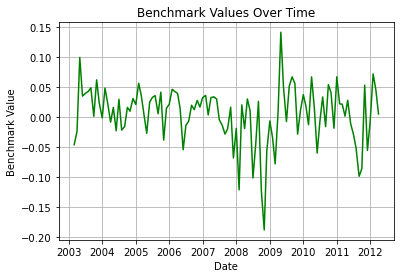

In [140]:
import matplotlib.pyplot as plt
from datetime import datetime

benchmark_values = benchmark

date_strings = ['31/01/2003', '28/02/2003', '31/03/2003', '30/04/2003', '30/05/2003', '30/06/2003', '31/07/2003', '29/08/2003', '30/09/2003', '31/10/2003', '28/11/2003', '31/12/2003', '30/01/2004', '27/02/2004', '31/03/2004', '30/04/2004', '31/05/2004', '30/06/2004', '30/07/2004', '31/08/2004', '30/09/2004', '29/10/2004', '30/11/2004', '31/12/2004', '31/01/2005', '28/02/2005', '31/03/2005', '29/04/2005', '31/05/2005', '30/06/2005', '29/07/2005', '31/08/2005', '30/09/2005', '31/10/2005', '30/11/2005', '30/12/2005', '31/01/2006', '28/02/2006', '31/03/2006', '28/04/2006', '31/05/2006', '30/06/2006', '31/07/2006', '31/08/2006', '29/09/2006', '31/10/2006', '30/11/2006', '29/12/2006', '31/01/2007', '28/02/2007', '30/03/2007', '30/04/2007', '31/05/2007', '29/06/2007', '31/07/2007', '31/08/2007', '28/09/2007', '31/10/2007', '30/11/2007', '31/12/2007', '31/01/2008', '29/02/2008', '31/03/2008', '30/04/2008', '30/05/2008', '30/06/2008', '31/07/2008', '29/08/2008', '30/09/2008', '31/10/2008', '28/11/2008', '31/12/2008', '30/01/2009', '27/02/2009', '31/03/2009', '30/04/2009', '29/05/2009', '30/06/2009', '31/07/2009', '31/08/2009', '30/09/2009', '30/10/2009', '30/11/2009', '31/12/2009', '29/01/2010', '26/02/2010', '31/03/2010', '30/04/2010', '31/05/2010', '30/06/2010', '30/07/2010', '31/08/2010', '30/09/2010', '29/10/2010', '30/11/2010', '31/12/2010', '31/01/2011', '28/02/2011', '31/03/2011', '29/04/2011', '31/05/2011', '30/06/2011', '29/07/2011', '31/08/2011', '30/09/2011', '31/10/2011', '30/11/2011', '30/12/2011', '31/01/2012', '29/02/2012', '30/03/2012']
datetime_objects = [datetime.strptime(date_str, '%d/%m/%Y') for date_str in date_strings]

# Plot
plt.plot(datetime_objects, benchmark_values, color='green')
plt.xlabel('Date')
plt.ylabel('Benchmark Value')
plt.title('Benchmark Values Over Time')
plt.grid(True)
plt.show()


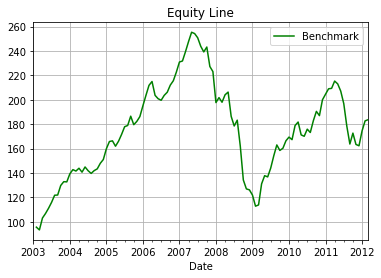

In [141]:
# Equity line for benchmark
b = benchmark
ret=np.exp(benchmark)
equity_b = 100 * np.cumprod(ret)

pdf = pd.DataFrame({'Date': datetime_objects, 'Benchmark': equity_b})

pdf.set_index('Date', inplace=True)

pdf.plot(color='green')

plt.xlabel('Date')
#plt.ylabel('')
plt.title('Equity Line')
plt.grid(True)

plt.show()


# Univariate screening

The EBITDA Margin is a common financial indicator used to assess the operational efficiency of a company. It measures the percentage of earnings before interest, taxes, depreciation, and amortization in relation to total revenue.

Conducting a univariate screening with the EBITDA Margin would allow us to analyze the variability of the EBITDA margin among different companies or over time for the same company. We can use this metric to identify companies with a high EBITDA margin, which could indicate greater operational efficiency and potential profitability.

However, it is important to note that a univariate screening represents only an initial step in financial data analysis. To obtain a more comprehensive and accurate view, we may also consider other financial indicators and conduct a multivariate analysis that takes into account interactions among different financial variables.

In [142]:
#we set the name of the factor before applying the analysis in order to 
#make it replicable for each factor of the dataset
factor = "EBITDA_MARGIN"
posizione = fattori.index(factor)

In [143]:
#select just the subset containing the interest factor, and named it subdf

subdf = data[data.iloc[:, 0] == fattori[posizione]]
subdf = subdf.iloc[:798, 1:]

In [144]:
#3 months shift
subdf = subdf.T.shift(3).T

In [145]:
subdf = subdf.rename(index=dict(zip(subdf.index, equities)), columns=dict(zip(subdf.columns, date[1:])))

In [146]:
subdf

,31/01/2003,28/02/2003,31/03/2003,30/04/2003,30/05/2003,30/06/2003,31/07/2003,29/08/2003,30/09/2003,31/10/2003,...,30/06/2011,29/07/2011,31/08/2011,30/09/2011,31/10/2011,30/11/2011,30/12/2011,31/01/2012,29/02/2012,30/03/2012
ABI BB Equity,NaN,NaN,NaN,21.1241,21.1241,21.1241,21.1241,21.1241,21.5092,21.5092,...,37.9315,37.9315,37.9315,38.3831,38.3831,38.3831,38.3831,38.3831,38.3831,39.1769
FP FP Equity,NaN,NaN,NaN,15.5237,15.5237,16.1631,16.1631,16.1631,16.4293,16.4293,...,20.7485,20.7485,20.7485,20.0719,20.0719,20.0719,19.8918,19.8918,19.8918,19.7652
UNA NA Equity,NaN,NaN,NaN,0,0,0,0,0,0,0,...,17.2157,17.2157,17.2157,17.0812,17.0812,17.0812,17.0812,17.0812,17.0812,16.0587
SAN FP Equity,NaN,NaN,NaN,36.2782,36.2782,36.2782,36.2782,36.2782,37.4136,37.4136,...,40.6463,40.6463,40.6463,37.2468,37.2468,37.2468,37.2468,37.2468,37.2468,37.716
ENI IM Equity,NaN,NaN,NaN,29.2141,29.2141,29.4921,29.4921,29.4921,29.2023,29.2023,...,25.1107,25.1107,25.1107,23.9356,23.9356,23.9356,23.4303,23.4303,23.4303,23.4805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAM FP Equity,NaN,NaN,NaN,0,0,0,0,0,0,0,...,8.6319,8.6319,8.6319,7.9453,7.9453,7.9453,7.9453,7.9453,7.9453,7.4106
SII FP Equity,NaN,NaN,NaN,0,0,0,0,0,0,0,...,7.4677,7.4677,7.4677,7.4677,7.4677,7.4677,7.4677,7.9677,7.9677,7.9677
UZU GR Equity,NaN,NaN,NaN,0,0,0,0,0,0,0,...,11.2976,11.2976,11.2976,10.6984,10.6984,10.6984,10.6984,10.6984,10.6984,9.9982
TNFN FP Equity,NaN,NaN,NaN,0,0,0,0,0,0,0,...,2.29,2.29,2.29,5.2982,5.2982,5.2982,5.2982,5.2982,5.2982,2.8266


In [147]:
def turnover_function(prec, actual, ptf_size):
    k = 0
    for i in prec:
        if i not in actual: 
            k += 1
    return k / ptf_size

In [191]:
def univariate_function(df, ptf_size=50, trans_cost=0.002, holding_period=1):
    long_returns = []

    to_long = []
    long_temp = []

    # Compute returns for every month
    for i, mth in enumerate(df.columns[:-1]):
        if i % holding_period == 0:
            zero_mask = df[mth] != 0  
            ordered_pb = (df.loc[zero_mask, mth].dropna() * -1).sort_values(ascending=False)
            to_long = ordered_pb[:ptf_size].index  

        # Compute returns
        long_return = returns_function(log_returns.T.loc[to_long])[df.columns[i + 1]]

        # Transaction costs
        long_turnover = turnover_function(to_long, long_temp, ptf_size)
        long_fee = trans_cost * long_turnover

        long_temp = to_long

        long_returns.append(long_return - long_fee)

    long_returns = pd.Series(long_returns, index=df.columns[1:])

    return long_returns

In [192]:
univariate=univariate_function(subdf)

C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958: UserWarning: Parsing '28/02/2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_value(key)
C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958: UserWarning: Parsing '31/03/2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_value(key)
C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958: UserWarning: Parsing '30/04/2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_value(key)
C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958: UserWarning: Parsing '30/05/2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_value(key)
C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958

C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958: UserWarning: Parsing '31/03/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_value(key)
C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958: UserWarning: Parsing '28/04/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_value(key)
C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958: UserWarning: Parsing '31/05/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_value(key)
C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958: UserWarning: Parsing '30/06/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_value(key)
C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958

C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958: UserWarning: Parsing '31/03/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_value(key)
C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958: UserWarning: Parsing '30/04/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_value(key)
C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958: UserWarning: Parsing '29/05/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_value(key)
C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958: UserWarning: Parsing '30/06/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_value(key)
C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\series.py:958

In [193]:
univariate

28/02/2003         NaN
31/03/2003         NaN
30/04/2003         NaN
30/05/2003    0.020028
30/06/2003    0.096661
                ...   
30/11/2011   -0.081815
30/12/2011    0.024957
31/01/2012    0.094364
29/02/2012    0.025341
30/03/2012   -0.002835
Length: 110, dtype: float64

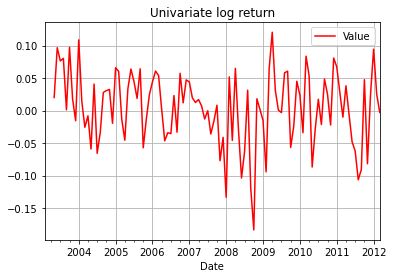

In [194]:
#plot the Univariate strategy log return
pdf = pd.DataFrame({'Date': datetime_objects[1:], 'Value': univariate})

pdf.set_index('Date', inplace=True)

pdf.plot(color='red')

plt.xlabel('Date')
#plt.ylabel('')
plt.title('Univariate log return')
plt.grid(True)

plt.show()

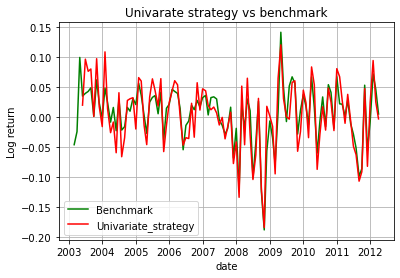

In [195]:
#Plot it in comparison with the benchmark.
import matplotlib.pyplot as plt
from datetime import datetime

plt.plot(datetime_objects, benchmark, label='Benchmark',color='green')

plt.plot(datetime_objects[1:], univariate, label='Univariate_strategy', color='red')

plt.xlabel('date')
plt.ylabel('Log return')
plt.title('Univarate strategy vs benchmark')
plt.grid(True)
plt.legend()

plt.show()

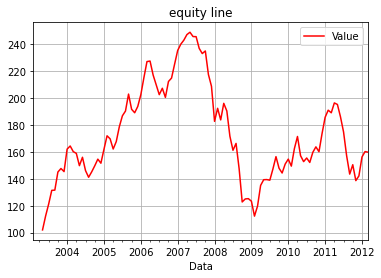

In [196]:
#equity line
import pandas as pd
import matplotlib.pyplot as plt

ret=np.exp(univariate)
equity_u = 100 * np.cumprod(ret)

pdf = pd.DataFrame({'Date': datetime_objects[1:], 'Value': equity_u})

pdf.set_index('Date', inplace=True)

pdf.plot(color='red')

plt.xlabel('Data')
#plt.ylabel('')
plt.title('equity line')
plt.grid(True)
plt.show()

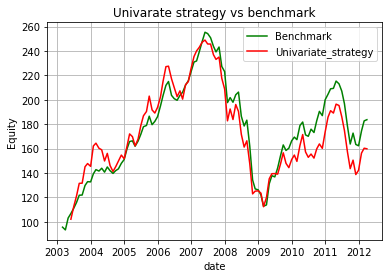

In [197]:
#equity line in comparison with the benchmark.
import matplotlib.pyplot as plt
from datetime import datetime

plt.plot(datetime_objects, equity_b, label='Benchmark', color='green')
plt.plot(datetime_objects[1:], equity_u, label='Univariate_strategy', color='red')

plt.xlabel('date')
plt.ylabel('Equity')
plt.title('Univarate strategy vs benchmark')
plt.grid(True)
plt.legend()

plt.show()

# Metrics 

In [155]:
#Sharpe uu
rf = 0.03 #3%
rf_log= np.log((1 + rf) ** (1 / 12))
num=univariate.iloc[3:] - rf_log
sharpe_ratio =(np.mean(num) / np.std(num)) * np.sqrt(12)
round(sharpe_ratio, 3)

0.119

In [156]:
#Traynor
rf = 0.03 #3%
rf_log= np.log((1 + rf) ** (1 / 12))
num=univariate.iloc[3:] - rf_log
Traynor = np.mean(num) / (np.cov(univariate.iloc[3:], benchmark.iloc[4:])[0][1] / np.var(benchmark.iloc[4:])) * 12
round(Traynor, 3)

0.021

In [157]:
#sortino
rf = 0.03 #3%
rf_log= np.log((1 + rf) ** (1 / 12))
num=univariate.iloc[3:] - rf_log
rp_under = num[num <= num.mean()]
Sortino = (np.mean(num) / np.std(rp_under) )* np.sqrt(12)

round(Sortino, 3)

0.169

In [158]:
Num=univariate[3:] - benchmark[4:]
IR=np.round(np.mean(Num) / np.std(Num) * np.sqrt(12), 3)
print(IR)

-0.15


# multifactor screeening #


### extraction of the IR for each factor of intereset


In [159]:
fattori = ["PE_RATIO", "FIVE_YR_AVG_PRICE_EARNINGS", "T12M_DIL_PE_CONT_OPS", "10_YEAR_MOVING_AVERAGE_PE", "PX_TO_TANG_BV_PER_SH", "CURRENT_EV_TO_12M_SALES", "CURRENT_EV_TO_T12M_EBITDA", "FIVE_YEAR_AVG_EV_TO_T12_EBITDA", "T12M_DIL_EPS_CONT_OPS", "TRAIL_12M_EBITDA_PER_SHARE", "TRAIL_12M_SALES_PER_SH", "NET_DEBT_PER_SHARE", "TANG_BOOK_VAL_PER_SH", "NORMALIZED_ACCRUALS_CF_METHOD", "EBITDA_MARGIN", "EBITDA_MARGIN_3YR_AVG", "RSI_14D", "PX_LAST", "MOV_AVG_50D", "MOV_AVG_20D", "MOV_AVG_10D", "MOV_AVG_5D", "MOV_AVG_40D", "MOV_AVG_30D", "OPERATING_ROIC", "VOLATILITY_90D", "VOLATILITY_30D", "VOLATILITY_180D", "RSI_30D", "RSI_9D", "T12M_DVD_PAYOUT_RATIO", "EQY_DPS_NET_5YR_GROWTH", "EQY_REC_CONS", "BEST_EPS", "WACC_COST_EQUITY", "NORMALIZED_ROE", "5YR_AVG_RETURN_ON_EQUITY", "CUR_MKT_CAP","NORMALIZED_ACCRUALS_BS_METHOD", "PX_TO_BOOK_RATIO"]

Factors considered for multivariate screening:

NB prendere i valori piu bassi ma senza considerare gli 0!!

PE_RATIO (Price/Earnings Ratio): This factor indicates the ratio of a stock's price to its earnings per share, providing an indication of the relative value of the company compared to its earnings. (decrescente, piu basso è meglio è)

CURRENT_EV_TO_12M_SALES (Current Enterprise Value to 12-Month Trailing Sales): This factor measures the company's valuation relative to its recent sales, providing an indication of sales profitability. (decrescente, piu basso è meglio è)

FIVE_YEAR_AVG_EV_TO_T12_EBITDA (Five-Year Average Enterprise Value to 12-Month Trailing EBITDA): This factor represents the ratio of the enterprise value to the EBITDA, a measure of the company's operational profitability over the past five years. (decrescente, piu basso è meglio è)

VOLATILITY_90D (90-Day Volatility): This factor measures the price fluctuations of a stock over a 90-day period, providing an indication of the stock's stability.


NUOVI FATTORI SOLO POSITIVI:
T12M_DIL_EPS_CONT_OPS (EPS diluito degli ultimi 12 mesi delle operazioni continue): Un valore più alto indica un maggior guadagno per azione e potenzialmente una maggiore redditività
TRAIL_12M_SALES_PER_SH (Vendite degli ultimi 12 mesi per azione): Un valore più alto può indicare un'azienda con maggiori entrate per azione.
TANG_BOOK_VAL_PER_SH (Valore contabile tangibile per azione): Un valore più alto può indicare un'azione valutata a un prezzo relativamente più basso rispetto al suo valore contabile tangibile.
NORMALIZED_ROE (ROE normalizzato - Ritorno sull'Equity): Valori più alti possono indicare una maggiore redditività per gli azionisti.

In [160]:
# Function to match a given string
def matching_fun(x, string):
    if pd.isna(x):
        return False
    else:
        return string in x

# Function to get the factor df for all equities
def factor_fun(factor, perfect_match=False):
    if perfect_match:
        price_book = data[0].apply(lambda x: x == factor)
    else:
        price_book = data[0].apply(matching_fun, args={factor})
    df = data[price_book].set_index(equities)
    df.drop(0, axis=1, inplace=True)
    df.columns = dates[1:]

    return df

In [161]:
# Get all equities
equities = data[0].apply(matching_fun, args={'Equity'})
equities = data.loc[equities][0]

# Get all factors
factors = [i for i in data[0].unique() if i not in equities.values][1:-1]

# Get all dates
dates = data.iloc[1]

prices = factor_fun('PX_LAST').T # get prices
log_returns = np.log(prices.pct_change() + 1) # compute log returns

C:\Users\Loren\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [162]:
def returns_function(df):
    returns = []
    for mth in df.columns:

        mth = mth.strftime('%Y-%m-%d')

        zero_mask = df[mth].apply(lambda x: (x != 0) and (not pd.isna(x)) and (np.abs(x) != np.inf))

        returns.append(df[mth].loc[zero_mask].mean())

    return pd.Series(returns, index=dates[1:])

In [163]:
CAP = factor_fun('CUR_MKT_CAP', perfect_match=True)

ptf_size = int(0.3 * len(CAP))
top30 = []

for mth in CAP.columns:
    ordered_pb = (CAP[mth]).sort_values(ascending=False)

    top30.append(list(ordered_pb[:ptf_size].index))

In [164]:
def screening_m(df, equities, sign, ptf_size = 50, trans_cost = 0.002, holding_period=1):

    returns = []
    temp = []

    for (i, mth), eqy in zip(enumerate(df.columns[:-1]), equities):

        if i % holding_period == 0:
            mth_df = df.loc[eqy, mth] # monthly factor series filtered for selected stocks

            zero_mask = mth_df != 0 # filter non-zero stocks

            ordered_pb = (mth_df.loc[zero_mask].dropna() * sign).sort_values(ascending=False)

            to_long = ordered_pb[-ptf_size:].index

        # Compute returns
        ret = returns_function(log_returns.T.loc[to_long])[df.columns[i+1]]

        # Transaction costs
        long_fee = trans_cost * turnover_function(to_long, temp, ptf_size)

        temp = to_long

        returns.append(ret - long_fee)

    returns = pd.Series(returns, index=df.columns[1:])

    return returns

In [165]:
PE = factor_fun('PE_RATIO', perfect_match=True)
EV = factor_fun('CURRENT_EV_TO_12M_SALES', perfect_match=True)
EBI = factor_fun('FIVE_YEAR_AVG_EV_TO_T12_EBITDA', perfect_match=True)
VOL = factor_fun('VOLATILITY_90D', perfect_match=True)

In [166]:
# shift of 3 periods
PE = PE.T.shift(3, fill_value=np.nan).T
EV = EV.T.shift(3, fill_value=np.nan).T
EBI = EBI.T.shift(3, fill_value=np.nan).T
VOL = VOL.T.shift(3, fill_value=np.nan).T

In [167]:
PE_screen = screening_m(PE, top30, 1)
EV_screen = screening_m(EV, top30, 1)
EBI_screen = screening_m(EBI, top30, -1)
VOL_screen = screening_m(VOL, top30, 1)

In [168]:
def standardize(x):
    y = x[x != 0].dropna() # filter nan and non-zero entities to compute mean and std
    if np.std(y) == 0:
        return np.repeat(np.nan, len(x))
    else:
        return np.where(x != 0, (x - np.mean(y)) / np.std(y), 0)

In [169]:
PEz = PE.apply(standardize)
EVz = EV.apply(standardize)
EBIz = EBI.apply(standardize)
VOLz = VOL.apply(standardize)

In [170]:
def get_IR(strat, bchmk):
    alpha = strat - bchmk
    std_dev = np.std(alpha)
    
    if std_dev == 0:
        return np.nan 
    else:
        return np.round(np.mean(alpha) / std_dev * np.sqrt(12), 3)

In [171]:
weights = {
    'PE': [],
    'EV': [],
    'EBI': [],
    'VOL': []
}
bch=returns_function(log_returns.T)
Zscores = []

for i, mth in enumerate(PE.columns):
    # Get the IR for each univariate screening
    PE_IR = get_IR(PE_screen.loc[:mth], bch.loc[:mth])
    EV_IR = get_IR(EV_screen.loc[:mth], bch.loc[:mth])
    EBI_IR = get_IR(EBI_screen.loc[:mth], bch.loc[:mth])
    VOL_IR = get_IR(VOL_screen.loc[:mth], bch.loc[:mth])

    TOT_IR = np.sum(np.abs((PE_IR, EV_IR, EBI_IR, VOL_IR)))
    sign = np.sign(np.sum((PE_IR, EV_IR, EBI_IR, VOL_IR)))

    weights['PE'].append(PE_IR / TOT_IR * sign)
    weights['EV'].append(EV_IR / TOT_IR * sign)
    weights['EBI'].append(EBI_IR / TOT_IR * sign)
    weights['VOL'].append(VOL_IR / TOT_IR * sign)

    Zsc = (PEz.loc[:, mth] * PE_IR + EVz.loc[:, mth] * EV_IR + EBIz.loc[:, mth] * EBI_IR - VOLz.loc[:, mth] * VOL_IR) / TOT_IR * sign
    Zscores.append(Zsc)

Zscores = pd.concat(Zscores, axis=1)
weights = pd.DataFrame(weights)

weights.index = Zscores.columns

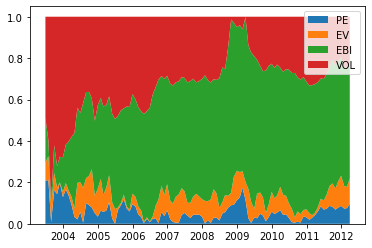

In [172]:
plt.stackplot(Zscores.columns, np.abs(weights).values.T, labels=weights.columns)
plt.legend()

In [173]:
(PE_IR, EV_IR, EBI_IR, VOL_IR) / np.sum((PE_IR, EV_IR, EBI_IR, VOL_IR))

array([0.0968254 , 0.12169312, 0.55026455, 0.23121693])

In [174]:
multiv_returns = univariate_function(Zscores)

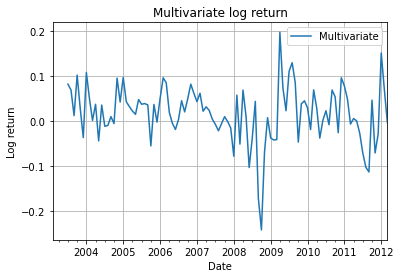

In [175]:
#plot
#plot the Univariate strategy log return
pdf = pd.DataFrame({'Date': datetime_objects[1:], 'Multivariate': multiv_returns})

pdf.set_index('Date', inplace=True)

pdf.plot()

plt.xlabel('Date')
plt.ylabel('Log return')
plt.title('Multivariate log return')
plt.grid(True)

plt.show()

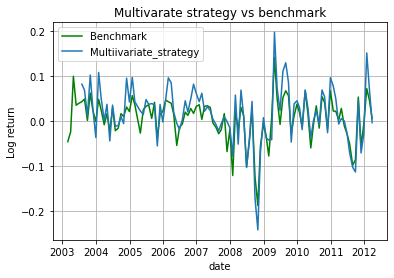

In [176]:
import matplotlib.pyplot as plt
from datetime import datetime

plt.plot(datetime_objects, benchmark, label='Benchmark',color='green')

plt.plot(datetime_objects[1:], multiv_returns, label='Multiivariate_strategy')

plt.xlabel('date')
plt.ylabel('Log return')
plt.title('Multivarate strategy vs benchmark')
plt.grid(True)
plt.legend()

plt.show()

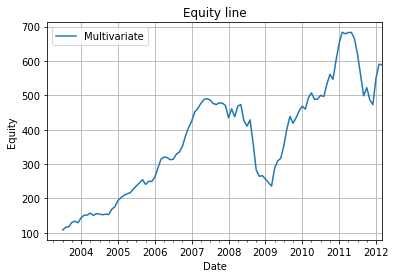

In [177]:
#equity line
import pandas as pd
import matplotlib.pyplot as plt

ret=np.exp(multiv_returns)
equity_m = 100 * np.cumprod(ret)

pdf = pd.DataFrame({'Date': datetime_objects[1:], 'Multivariate': equity_m})

pdf.set_index('Date', inplace=True)

pdf.plot()

plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Equity line')
plt.grid(True)
plt.show()

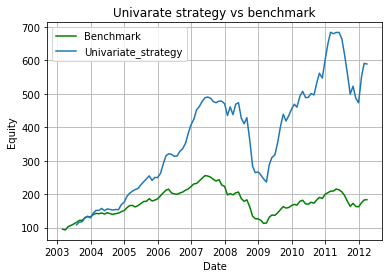

In [178]:
#equity line in comparison with the benchmark.
import matplotlib.pyplot as plt
from datetime import datetime

plt.plot(datetime_objects, equity_b, label='Benchmark', color='green')
plt.plot(datetime_objects[1:], equity_m, label='Univariate_strategy')

plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Univarate strategy vs benchmark')
plt.grid(True)
plt.legend()

plt.show()

# Metrics Multivariate


In [179]:
#Sharpe
rf = 0.03 #3%
rf_log= np.log((1 + rf) ** (1 / 12))
num=multiv_returns.iloc[3:] - rf_log
sharpe_ratio =(np.mean(num) / np.std(num)) * np.sqrt(12)
round(sharpe_ratio, 3)

0.801

In [180]:
#Traynor
rf = 0.03 #3%
rf_log= np.log((1 + rf) ** (1 / 12))
num=multiv_returns.iloc[3:] - rf_log
Traynor = np.mean(num) / (np.cov(univariate.iloc[3:], benchmark.iloc[4:])[0][1] / np.var(benchmark.iloc[4:])) * 12
round(Traynor, 3)

0.158

In [181]:
#sortino
rf = 0.03 #3%
rf_log= np.log((1 + rf) ** (1 / 12))
num=multiv_returns.iloc[3:] - rf_log
rp_under = num[num <= num.mean()]
Sortino = (np.mean(num) / np.std(rp_under) )* np.sqrt(12)

round(Sortino, 3)

1.031

In [182]:
multiv = multiv_returns.rename(lambda x: x.strftime('%d/%m/%Y'))

In [183]:
Num=multiv[5:] - benchmark[6:]
IR=np.round(np.mean(Num) / np.std(Num) * np.sqrt(12), 3)
print(IR)

1.568


## SEQUENTIAL

We followed the lakonishock strategy, applying the 6th steps using the factor: CUR_MKT_CAP, PE_RATIO, PX_TO_BOOK_RATIO, EQY_REC_CONS, RSI_14D, RSI_30D. 

In [95]:
subdf.T

,30,73,116,159,202,245,288,331,374,417,...,33914,33957,34000,34043,34086,34129,34172,34215,34258,34301
0,RSI_30D,RSI_30D,RSI_30D,RSI_30D,RSI_30D,RSI_30D,RSI_30D,RSI_30D,RSI_30D,RSI_30D,...,RSI_30D,RSI_30D,RSI_30D,RSI_30D,RSI_30D,RSI_30D,RSI_30D,RSI_30D,RSI_30D,RSI_30D
1,0,41.035,52.2584,46.1135,54.8909,35.5099,31.9672,40.8582,46.3537,43.9461,...,28.4573,28.5559,29.5707,0,0,44.2713,36.2623,42.7491,56.3697,0
2,0,40.3799,52.3918,46.5817,53.9788,35.3136,31.7367,40.2237,45.7471,43.5595,...,28.3002,28.8367,30.3723,0,0,43.9587,35.9229,42.1986,55.5442,0
3,0,38.9643,53.2703,45.1145,50.123,35.5879,31.2617,39.6523,42.664,43.7715,...,27.7727,28.7199,31.8622,0,0,48.0096,36.5949,44.0615,55.4322,0
4,0,39.4633,54.1235,48.6156,51.476,37.4369,32.6805,42.0013,43.8047,47.8645,...,28.2852,28.7625,37.697,0,0,46.8599,37.1067,43.4816,57.7245,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,60.6063,46.5648,60.1265,49.6633,45.9567,49.5074,58.679,56.8822,49.1955,54.9998,...,44.3636,41.7547,68.6668,57.5227,NaN,41.1698,46.0739,49.9627,55.7035,NaN
108,62.971,47.6865,62.4223,52.9984,46.6664,49.2431,56.0106,53.4569,48.2662,54.9998,...,44.9711,42.6428,66.1123,62.0361,NaN,40.4903,45.3999,49.6375,56.1436,NaN
109,61.7586,48.5543,59.3186,52.7811,48.5513,48.5652,59.7454,57.6328,50.5113,57.4557,...,47.1596,42.5756,69.2606,58.3245,NaN,43.5226,48.76,50.4628,55.5724,NaN
110,64.7618,50.0555,57.9351,52.0243,49.4035,49.7488,60.4066,60.7946,50.9076,60.6565,...,49.4293,43.3599,69.2001,56.5834,NaN,44.0459,50.3995,49.0926,60.9196,NaN


In [96]:
factor = "CUR_MKT_CAP" #here we can change the factor and obtain which the following codes the IR
posizione = fattori.index(factor)
subdf = data[data.iloc[:, 0] == fattori[posizione]]
MKT_CAPdf = subdf.iloc[:798, 1:]
MKT_CAPdf

,1,2,3,4,5,6,7,8,9,10,...,102,103,104,105,106,107,108,109,110,111
39,8015.6245,6876.0854,8011.3081,8632.875,7735.0562,8352.3066,8555.1797,9703.3516,9228.5439,8693.3057,...,64225.1563,64546.2813,61736.4336,63863.8906,64567.8828,71126.625,75951.3516,74449.4609,80978.1406,87982.2031
82,86311.1406,84249.5703,79714.1094,80744.8984,85555.2344,90434.2891,89266.8984,94617.4922,87776.8672,90553.75,...,94127.4219,89213.3281,80275.4688,78559.3281,89385.3125,90614.4688,93368.2422,95507.4297,99253.9844,90395.1797
125,29893.4238,30064.8965,31179.4707,32265.4648,28407.3262,26704.0313,28807.4316,28978.9023,28864.5879,28561.6523,...,68377.5,68513.625,71281.3984,71856.1172,75531.3516,76514.4453,80371.1719,76303.8594,74744.8047,76498.7422
168,35629.8945,36341.4961,33770.7852,39148.2852,39808.7109,37355.4258,36696.2109,37505.5586,38254.543,39024.1602,...,74834.2031,73312.0078,68425.8203,66542.0078,70061.5078,69819.0859,76066.5703,75721.6875,74434.3984,78081.7031
211,56281.5117,54932.9023,48898.2578,51175.293,54905.0273,52712.0234,52452.2031,55065.4922,52513.6797,54663.2969,...,65327.4023,60801.3477,56075.0234,52950.8438,64045.6875,62804.0273,64125.7969,67690.5625,69332.7578,70454.2656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34138,148.9819,145.4347,183.2714,170.8562,232.932,271.951,283.775,300.9197,283.775,286.1398,...,230.9351,191.7408,154.6219,115.7469,106.567,95.0721,84.0562,118.7005,124.847,112.8732
34181,38.149,35.3418,38.415,40.7199,49.053,54,52.95,60,75,78,...,121,116.4,105.6,89.8,94,86,83.6,94,99.4,99.4
34224,49.8348,49.05,51.012,50.2272,54.936,54.936,54.936,54.5039,54.5039,56.8398,...,95.0971,112.6396,102.8537,102.3997,104.1652,98.8687,97.8598,100.3567,96.2456,98.3642
34267,39.5325,38.403,38.2524,42.168,45.18,48.8697,49.3215,51.957,49.5474,50.451,...,85.8374,87.2108,85.8374,84.6151,85.8374,85.8374,86.5241,85.8374,94.7645,103.0049


In [97]:
#in this code we extract all the interest dataframe 
factor = "CUR_MKT_CAP" #here we can change the factor and obtain which the following codes the IR
posizione = fattori.index(factor)
subdf = data[data.iloc[:, 0] == fattori[posizione]]
MKT_CAPdf = subdf.iloc[:798, 1:]
factor = "PE_RATIO" #here we can change the factor and obtain which the following codes the IR
posizione = fattori.index(factor)
subdf = data[data.iloc[:, 0] == fattori[posizione]]
PEdf = subdf.iloc[:798, 1:]
factor = "PX_TO_BOOK_RATIO" #here we can change the factor and obtain which the following codes the IR
posizione = fattori.index(factor)
subdf = data[data.iloc[:, 0] == fattori[posizione]]
PBdf = subdf.iloc[:798, 1:]
factor = "EQY_REC_CONS" #here we can change the factor and obtain which the following codes the IR
posizione = fattori.index(factor)
subdf = data[data.iloc[:, 0] == fattori[posizione]]
CONSdf = subdf.iloc[:798, 1:]
factor = "RSI_14D" #here we can change the factor and obtain which the following codes the IR
posizione = fattori.index(factor)
subdf = data[data.iloc[:, 0] == fattori[posizione]]
RSIdf = subdf.iloc[:798, 1:]
factor = "RSI_30D" #here we can change the factor and obtain which the following codes the IR
posizione = fattori.index(factor)
subdf = data[data.iloc[:, 0] == fattori[posizione]]
RSI2df = subdf.iloc[:798, 1:]
#we reset the indices in order to be able to manage the df
MKT_CAPdf = MKT_CAPdf.reset_index(drop=True)
PEdf = PEdf.reset_index(drop=True)
PBdf = PBdf.reset_index(drop=True)
CONSdf = CONSdf.reset_index(drop=True)
RSIdf = RSIdf.reset_index(drop=True)
RSI2df = RSI2df.reset_index(drop=True)


In [88]:
log_returns_df = log_returns
log_returns_df

,ABI BB Equity,FP FP Equity,UNA NA Equity,SAN FP Equity,ENI IM Equity,SIE GR Equity,MC FP Equity,SAP GR Equity,VOW GR Equity,BAS GR Equity,...,SBT FP Equity,HIM FP Equity,BUE GR Equity,ALMIL FP Equity,M5Z GR Equity,TAM FP Equity,SII FP Equity,UZU GR Equity,TNFN FP Equity,MLM IM Equity
1,,,,,,,,,,,,,,,,,,,,,
2003-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-28,-0.153347,-0.024176,0.005720,0.019742,-0.024254,-0.036572,-0.027286,-0.110248,-0.039132,-0.020487,...,-0.103328,0.177681,0.044423,NaN,-0.016504,-0.024098,-0.076425,-0.015850,-0.028988,NaN
2003-03-31,0.152804,-0.055337,0.036402,-0.073364,-0.116373,0.027355,-0.058018,-0.110474,-0.239441,0.008538,...,-0.449444,-0.177681,0.076938,NaN,0.086621,0.231241,0.083342,0.039164,-0.003929,NaN
2003-04-30,0.074728,0.012849,0.034241,0.147717,0.045515,0.166993,0.078169,0.279034,0.075829,0.158539,...,0.190850,0.027399,0.273293,NaN,0.138704,-0.070146,0.058306,-0.015482,0.097455,NaN
2003-05-30,-0.109818,0.057868,-0.127350,0.016698,0.070347,-0.102951,0.109393,0.038969,-0.025418,-0.081274,...,-0.016518,-0.027399,0.295196,NaN,0.133116,0.309924,0.186158,0.089635,0.068993,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-11-30,0.096745,0.013657,0.012932,0.002499,-0.019578,-0.024085,-0.030824,0.007490,-0.019942,0.013639,...,-0.015915,-0.253523,-0.011581,-0.012864,0.000000,-0.114138,-0.088947,-0.052186,0.000000,0.0
2011-12-30,0.065631,0.029937,0.049176,0.085683,0.020828,-0.009691,-0.063738,-0.079383,-0.079263,0.000000,...,0.031582,0.094858,-0.043849,0.143541,0.000000,-0.123150,-0.028304,-0.010257,0.007968,0.0
2012-01-31,-0.020287,0.022653,-0.043067,-0.004946,0.054100,-0.024923,0.122040,0.122857,0.175221,0.090847,...,0.107948,-0.009091,0.112696,-0.080574,0.000000,0.345117,0.117251,0.025195,-0.007968,0.0


In [101]:
prices = data[data.iloc[:, 0] == fattori[17]]
prices = prices.iloc[:798, 1:]
p = prices
p = p.replace(0, np.nan)  
log_returns_df = pd.DataFrame()
# compute log return for eahc stock
for col in prices.columns:
    returns = np.log(p[col] / p.shift(1, axis=1)[col])
    log_returns_df[col] = returns
print(log_returns_df)

C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns = np.log(p[col] / p.shift(1, axis=1)[col])
C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns = np.log(p[col] / p.shift(1, axis=1)[col])
C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns = np.log(p[col] / p.shift(1, axis=1)[col])
C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns = np.log(p[col] / p.shift(1, axis=1)[col])
C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns = np.log(p[col] / p.shift(1, axis=1)[col])
C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns = np.log(p[col] / p.shift(1, axis=1)[col])
C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns = np.log(p[col] / p.shift(1, axis=1)[col])
C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns = np.log(p[col] / p.shift(1, axis=1)[col])
C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

       1         2         3         4         5         6         7    \
19     NaN -0.153347  0.152804  0.074728 -0.109818  0.076775  0.024005   
62     NaN -0.024176 -0.055337  0.012849  0.057868  0.055463  0.001517   
105    NaN  0.005720  0.036402  0.034241 -0.127350 -0.061837  0.075821   
148    NaN  0.019742 -0.073364  0.147717  0.016698 -0.063619 -0.017805   
191    NaN -0.024254 -0.116373  0.045515  0.070347 -0.040761 -0.004947   
...    ...       ...       ...       ...       ...       ...       ...   
34118  NaN -0.024098  0.231241 -0.070146  0.309924  0.154876  0.042560   
34161  NaN -0.076425  0.083342  0.058306  0.186158  0.080970 -0.019636   
34204  NaN -0.015850  0.039164 -0.015482  0.089635  0.000000  0.000000   
34247  NaN -0.028988 -0.003929  0.097455  0.068993  0.078503  0.009203   
34290  NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            8         9         10   ...       102       103       104  \
19     0.125930 -0.050171 -0.059747  

C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns = np.log(p[col] / p.shift(1, axis=1)[col])
C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  log_returns_df[col] = returns
C:\Users\Loren\AppData\Local\Temp\ipykernel_572\46159970.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

In [102]:
lista_indici = []
l = log_returns_df.reset_index(drop=True)

for col in range(0, 111):   
        #step 1 select 30% of market cap
        df = MKT_CAPdf.iloc[:, col]
        df = df[df.rank(pct=True) > 0.7]
        indici = df.index
        #step 2 PE under the mean of PE 
        PE = PEdf.iloc[:, col]
        pe_mean = PE[indici].mean()
        newdf = df[PE[indici] < pe_mean]
        indici = newdf.index
        #step 3 the same but for PB
        PB = PBdf.iloc[:, col]
        pb_mean = PB[indici].mean()
        newdf2 = newdf[PB[indici] < pb_mean]
        indici = newdf2.index
        #step 4 delta census positive
        CONS = CONSdf.iloc[:, col]
        CONSp = CONSdf.iloc[:, col-1]
        difCONS = CONS[indici] - CONSp[indici]
        newdf3 = newdf2[difCONS > 0]
        indici = newdf3.index
        #step 5 RIS14D positive
        RSI = RSIdf.iloc[:, col]
        newdf4 = newdf3[RSI[indici] > 0]
        indici = newdf4.index
        #step 6 due to selecting the stpcks which have RSI14D higher than RSI 30D compromise crucialy our permance
        #sometimes obtaining empty portfolio or composed by just  few stockes, we decides to apply a more soft selection
        #in this step, considering the 20 stocks with the high difference between teh RSIs value. through that keep our portfolio 
        #composed by 20 stocks, also to be coerent with all the project
        RSI2 = RSI2df.iloc[:, col]
        RSI2sorted = RSI2[indici].sort_values(ascending=False)
        top_20_indices = RSI2sorted.index
        newdf5 = newdf4.loc[top_20_indices]
        indici = newdf5.index

        common_indices = indici.intersection(l.index)
        lista_indici.append(common_indices.tolist())


In [198]:
lista_indici

[[601,
  27,
  417,
  180,
  4,
  146,
  205,
  46,
  251,
  145,
  56,
  331,
  200,
  67,
  232,
  90,
  43,
  86,
  272,
  64,
  50,
  10,
  114,
  183,
  239,
  488,
  116,
  33],
 [121,
  30,
  180,
  145,
  58,
  201,
  119,
  276,
  187,
  91,
  12,
  35,
  67,
  117,
  71,
  32,
  183,
  241,
  38,
  42,
  83,
  113,
  41,
  311,
  310,
  16,
  20,
  159,
  118],
 [313,
  121,
  180,
  145,
  263,
  467,
  276,
  31,
  12,
  71,
  35,
  61,
  232,
  352,
  23,
  64,
  86,
  183,
  72,
  13,
  42,
  16,
  135,
  33,
  20,
  159,
  160,
  36],
 [180,
  222,
  251,
  119,
  331,
  43,
  114,
  10,
  80,
  64,
  44,
  72,
  13,
  83,
  197,
  488,
  113,
  40,
  69,
  20,
  159,
  118,
  36],
 [313,
  121,
  417,
  56,
  35,
  12,
  43,
  8,
  61,
  117,
  10,
  64,
  155,
  13,
  36,
  42,
  197,
  310,
  54,
  41,
  40,
  311,
  16,
  124,
  20,
  278],
 [146,
  205,
  82,
  4,
  46,
  263,
  276,
  56,
  35,
  114,
  50,
  323,
  86,
  13,
  72,
  310,
  70,
  311,
  16,
  69,
 

In [103]:
#now we calculate return, transaction, and equity as always for our portfolio each period of time
medie_valori_sq = []
transaction_costs_sq = []
cum_equity_sq = []
turning_sq = []

l = log_returns_df.reset_index(drop=True)
for elem in range(0, 111): 
    ind = lista_indici[elem]
    tot_az = len(ind)
    column = l.iloc[:, elem]
    
    indp = lista_indici[elem - 1]
    turning_rate = len(set(ind) - set(indp)) / tot_az
    transaction_cost = turning_rate * 0.002
    
    medie_valori = column.loc[ind].mean()
    equity_sq = (column.loc[ind] - transaction_cost).sum() 

    
    medie_valori_sq.append(medie_valori - transaction_cost)
    cum_equity_sq.append(equity_sq)
    turning_sq.append(turning_rate)


In [104]:
medie_valori_sq

[nan,
 -0.0463886329483299,
 -0.023064820736184908,
 0.1698390024958234,
 0.042000037535976864,
 0.04188999576127215,
 0.06853253416133416,
 0.0608827146050072,
 -0.0373693714034698,
 0.09184768444114755,
 0.028106891703185626,
 0.02052123337075025,
 0.03839001946480111,
 0.04797302192165663,
 -0.018426186266678517,
 0.04639360572472706,
 -0.007451895604288648,
 0.037253333326115155,
 -0.010191641659914421,
 -0.012274670680492476,
 0.03466587006701688,
 0.023093511019129005,
 0.05045594460895972,
 0.022847462688522557,
 0.053386959888255925,
 0.06772184016448206,
 0.0026859896888701755,
 -0.05522168415263593,
 0.05343941461410914,
 0.035653854674865294,
 0.04278368142236138,
 -0.007966468411660932,
 0.05558656142600318,
 -0.050795470540561424,
 0.045328142146787855,
 0.04066555790193733,
 0.03905821648998342,
 0.007812976432545115,
 0.056088413065657046,
 0.0017531126729204377,
 -0.06140519798041058,
 0.011007550232928038,
 0.012594972788701541,
 0.04955587221862292,
 0.029654178089362

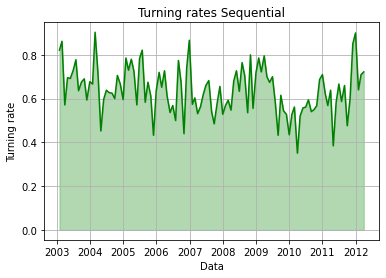

In [105]:
#representing the turning rate
import matplotlib.pyplot as plt
import pandas as pd

pdf = pd.DataFrame({'Date': datetime_objects, 'Value': turning_sq})
pdf.set_index('Date', inplace=True)

plt.plot(pdf.index, pdf['Value'], color = 'green')
plt.fill_between(pdf.index, pdf['Value'], color = 'green', alpha=0.3)

plt.xlabel('Data')
plt.ylabel('Turning rate')
plt.title('Turning rates Sequential')
plt.grid(True)

plt.show()

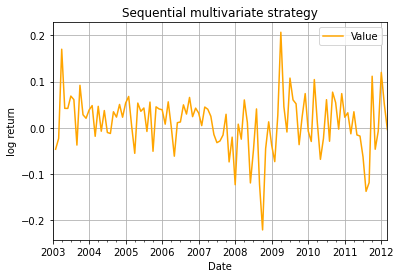

In [106]:
#graph of log return
pdf = pd.DataFrame({'Date': datetime_objects, 'Value': medie_valori_sq})

pdf.set_index('Date', inplace=True)

pdf.plot(color='orange')

plt.xlabel('Date')
plt.ylabel('log return')
plt.title('Sequential multivariate strategy')
plt.grid(True)

plt.show()

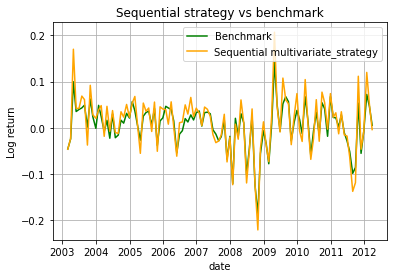

In [107]:
#compare with benchmark
import matplotlib.pyplot as plt
from datetime import datetime

plt.plot(datetime_objects, benchmark, label='Benchmark', color='green')

plt.plot(datetime_objects, medie_valori_sq, label='Sequential multivariate_strategy', color='orange')

plt.xlabel('date')
plt.ylabel('Log return')
plt.title('Sequential strategy vs benchmark')
plt.grid(True)
plt.legend()

plt.show()

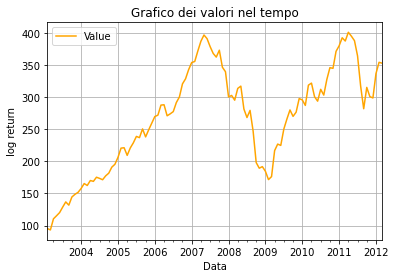

In [114]:
ret=np.exp(medie_valori_sq[1:])
equity_sq = 100 * np.cumprod(ret)
pdf = pd.DataFrame({'Date': datetime_objects[1:], 'Value': equity_sq})

pdf.set_index('Date', inplace=True)

pdf.plot(color='orange')

plt.xlabel('Data')
plt.ylabel('log return')
plt.title('Grafico dei valori nel tempo')
plt.grid(True)

plt.show()

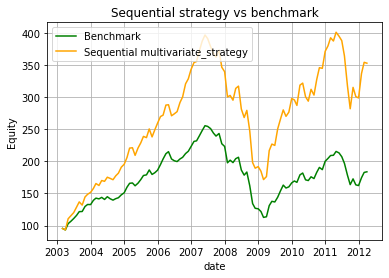

In [117]:
#compare with benchmark
import matplotlib.pyplot as plt
from datetime import datetime

plt.plot(datetime_objects, equity_b, label='Benchmark', color='green')
plt.plot(datetime_objects[1:], equity_sq, label='Sequential multivariate_strategy', color='orange')

plt.xlabel('date')
plt.ylabel('Equity')
plt.title('Sequential strategy vs benchmark')
plt.grid(True)
plt.legend()

plt.show()

In [120]:
#Sharpe
rf = 0.03 #3%
rf_log= np.log((1 + rf) ** (1 / 12))
num=medie_valori_sq[3:] - rf_log
sharpe_ratio =(np.mean(num) / np.std(num)) * np.sqrt(12)
round(sharpe_ratio, 3)

0.563

In [127]:
#Traynor
rf = 0.03 #3%
rf_log= np.log((1 + rf) ** (1 / 12))
num=medie_valori_sq[3:] - rf_log
Traynor = np.mean(num) / (np.cov(medie_valori_sq[3:], benchmark.iloc[3:])[0][1] / np.var(benchmark.iloc[4:])) * 12
round(Traynor, 3)

0.092

In [128]:
#sortino
rf = 0.03 #3%
rf_log= np.log((1 + rf) ** (1 / 12))
num=medie_valori_sq[3:] - rf_log
rp_under = num[num <= num.mean()]
Sortino = (np.mean(num) / np.std(rp_under) )* np.sqrt(12)

round(Sortino, 3)

0.737

In [129]:
Num=medie_valori_sq[3:] - benchmark[3:]
IR=np.round(np.mean(Num) / np.std(Num) * np.sqrt(12), 3)
print(IR)

1.027
